## Lending Club dataset

### Converting data types, binarizing, one-hot encoding, features

In [2]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
df = pd.read_csv('./Data/LCdataset_cleaned80_254794.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0
1,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0
2,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0
3,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,3 years,MORTGAGE,87000.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0
4,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,8 years,RENT,75000.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,36 months,17.74%,540.34,C,C5,Special Education Teacher,1 year,RENT,62000.0,...,0.0,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0
254790,6000.0,36 months,11.02%,196.49,B,B2,Assistant Foreman,10+ years,MORTGAGE,80000.0,...,0.0,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0
254791,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0
254792,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0


In [4]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 80, dtype: int64

## Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254794 entries, 0 to 254793
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   254794 non-null  float64
 1   term                        254794 non-null  object 
 2   int_rate                    254794 non-null  object 
 3   installment                 254794 non-null  float64
 4   grade                       254794 non-null  object 
 5   sub_grade                   254794 non-null  object 
 6   emp_title                   254794 non-null  object 
 7   emp_length                  254794 non-null  object 
 8   home_ownership              254794 non-null  object 
 9   annual_inc                  254794 non-null  float64
 10  verification_status         254794 non-null  object 
 11  issue_d                     254794 non-null  object 
 12  loan_status                 254794 non-null  object 
 13  purpose       

The above **df.info()** shows a number of columns that are still an object. Some of these elements would have to get binarized (i.e. application_type, empl_length), some would have to be converted to a numeric data type (i.e. int_rate and revol_util). 

From Data Dictionary: <br>
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. <br>
int_rate: Interest Rate on the loan

#### Convert to float: int_rate and revol_util

In [6]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [7]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [8]:
df['initial_list_status'].value_counts(dropna=False)

w    237729
f     17065
Name: initial_list_status, dtype: int64

#### Variables: application type

In [9]:
df['application_type'].value_counts(dropna=False) #will include in pd.get_dummies

Individual    224549
Joint App      30245
Name: application_type, dtype: int64

In [10]:
df['application_type'] = np.where(df['application_type'] == 'Individual', 1, 0)

In [11]:
df['application_type'].value_counts(dropna=False) 

1    224549
0     30245
Name: application_type, dtype: int64

#### Variables: emp_length

In [12]:
df['emp_length'].value_counts(dropna=False) 

10+ years    86914
2 years      26235
3 years      23284
< 1 year     21854
1 year       20448
5 years      19119
4 years      17637
6 years      12738
7 years      10319
8 years       9097
9 years       7149
Name: emp_length, dtype: int64

In [13]:
def emp_length_classification(string):
    if "10+ years" in string:
        return 10
    elif "9 years" in string:
        return 9
    elif "8 years" in string:
        return 8
    elif "7 years" in string:
        return 7
    elif "6 years" in string:
        return 6
    elif "5 years" in string:
        return 5
    elif "4 years" in string:
        return 4
    elif "3 years" in string:
        return 3
    elif "2 years" in string:
        return 2
    elif "1 year" in string:
        return 1
    elif "< 1 year" in string:
        return 0

In [14]:
df['emp_length'] = df['emp_length'].map(emp_length_classification)

In [15]:
df['emp_length'].value_counts(dropna=False) 

10    86914
1     42302
2     26235
3     23284
5     19119
4     17637
6     12738
7     10319
8      9097
9      7149
Name: emp_length, dtype: int64

In [16]:
#test
def length(string):
    if '8 years' in string:
        return 8

In [17]:
length('Hello 8 years')

8

#### Variables: term

In [18]:
df['term'].value_counts(dropna=False) 

 36 months    168003
 60 months     86791
Name: term, dtype: int64

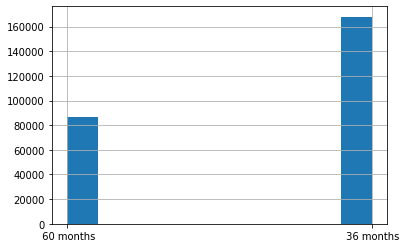

In [19]:
df['term'].hist();

#### More columns to convert: grade and subgrade

In [20]:
df['grade'].value_counts(dropna=False)

A    78850
B    74740
C    59542
D    41662
Name: grade, dtype: int64

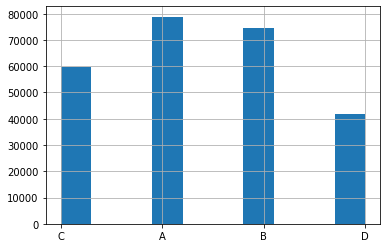

In [21]:
df['grade'].hist();

In [22]:
## Loan Amount by grade - grades C, B, and A are the most common
df.groupby(by='grade')['loan_amnt'].mean().sort_values(ascending=False)

grade
B    17453.822585
A    16581.908687
C    16019.888482
D    15416.210816
Name: loan_amnt, dtype: float64

In [23]:
df['sub_grade'].value_counts(dropna=False) #dropping to avoid multi collinearity

A4    22644
A5    18907
B4    17395
B5    16891
D2    15971
A1    15221
B2    14788
B1    13989
C5    13931
C1    12380
C2    11899
A3    11762
B3    11677
C3    11552
A2    10316
C4     9780
D3     8828
D1     8027
D4     4921
D5     3915
Name: sub_grade, dtype: int64

In [24]:
df.drop(columns='sub_grade', inplace=True)

#### Dropping non informative column

In [25]:
#dropping - this column is not informative
df.drop(columns= 'initial_list_status', axis=1, inplace=True)

In [26]:
df.shape

(254794, 78)

#### Variables: home_ownership

In [27]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    128214
RENT         99534
OWN          27044
ANY              2
Name: home_ownership, dtype: int64

In [28]:
df[df['home_ownership'] == 'ANY']

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
21141,15000.0,60 months,23.05,423.29,D,Heat Collision,3,ANY,60000.0,Source Verified,...,0.0,4.0,100.0,33.3,0.0,0.0,32552.0,19482.0,6500.0,16052.0
227679,5000.0,36 months,18.62,182.33,D,Do It Outdoors,3,ANY,36000.0,Not Verified,...,0.0,2.0,100.0,66.7,0.0,0.0,40061.0,37439.0,5900.0,33161.0


In [29]:
df.drop(df[df['home_ownership'] == 'ANY'].index, inplace=True)

In [30]:
df.shape

(254792, 78)

In [31]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    128214
RENT         99534
OWN          27044
Name: home_ownership, dtype: int64

#### Variables analysis: emp_title

The emp_title column is not standardized and does not to provide the kind of insight we would expect from this variable. The initial dataframe included 103,906 unique values within the emp_title column. If the values were categorized by industry and position level, we would be be able to include this element in our modeling. We will likely drop this column due to a wide range of diverse values within it, categorizing which appears to be rather subjective. 

df['emp_title'].nunique() 
103906

df['emp_title'].value_counts(dropna=False)

NaN                                54699<br>
Teacher                             6200<br>
Manager                             5374<br>
Driver                              2881<br>
Registered Nurse                    2715<br>
                                   ...  <br>
Manager trainer                        1<br>
VP Food and Beverage                   1<br>
Building Maintenance Supervisor        1<br>
Lead Medical Tech                      1<br>
Style Attendant                        1<br>
Name: emp_title, Length: 103907, dtype: int64

In [32]:
df['emp_title'].value_counts(dropna=False)

Teacher                               4955
Manager                               4249
Driver                                2344
Registered Nurse                      2245
RN                                    1744
                                      ... 
Journeyman Machine Builder               1
journeyman sheet metal foreman           1
Data Specialist and Credentialing        1
Radio Tec                                1
Construction splicer                     1
Name: emp_title, Length: 85767, dtype: int64

In [33]:
df['emp_title'].nunique() 

85767

In [34]:
df.drop(columns= 'emp_title', axis=1, inplace=True)

In [35]:
df.shape

(254792, 77)

#### Variables analysis: purpose - re-categorization

#df['purpose'].value_counts(dropna=False)<br>
debt_consolidation    139921
credit_card            69395
home_improvement       14959
other                  14062
major_purchase          4493
medical                 2816
car                     2028
house                   1973
vacation                1937
small_business          1640
moving                  1447
renewable_energy         123
Name: purpose, dtype: int64

In [36]:
df['purpose'].value_counts(dropna=False)

debt_consolidation    139919
credit_card            69395
home_improvement       14959
other                  14062
major_purchase          4493
medical                 2816
car                     2028
house                   1973
vacation                1937
small_business          1640
moving                  1447
renewable_energy         123
Name: purpose, dtype: int64

In [37]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.549150
credit_card           0.272359
home_improvement      0.058711
other                 0.055190
major_purchase        0.017634
medical               0.011052
car                   0.007959
house                 0.007744
vacation              0.007602
small_business        0.006437
moving                0.005679
renewable_energy      0.000483
Name: purpose, dtype: float64

In [38]:
def purpose_category(string):
    if "debt_consolidation" in string:
        return 'debt_consolidation'
    elif "credit_card" in string:
        return 'credit_card'
    elif "home_improvement" in string:
        return 'home_improvement'
    else:
        return 'other'
    
df['purpose'] = df['purpose'].map(purpose_category) 

In [39]:
df['purpose'].value_counts()

debt_consolidation    139919
credit_card            69395
other                  30519
home_improvement       14959
Name: purpose, dtype: int64

### One hot encoding with Pandas pd.get_dummies()

In [40]:
#State will not be included in dummies, as we want to test a model without the state data

In [41]:
pd.get_dummies(df[['term', 'purpose', 'grade', 'home_ownership','verification_status']], drop_first=True).head()

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,1,0,1


In [42]:
df_dummies = pd.get_dummies(df[['term', 'purpose', 'grade', 'home_ownership', 'verification_status']], drop_first=True) 

In [43]:
df_dummies.shape

(254792, 11)

In [44]:
df.shape

(254792, 77)

#### Column verification status

In [45]:
# verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified. 
# Using get dummies to binarize this column.
df['verification_status'].value_counts(dropna=False)

Source Verified    113493
Not Verified       110802
Verified            30497
Name: verification_status, dtype: int64

### Feature engineering a new column to calculate the age of the oldest credit line (Column issue_d and earliest_cr_line)

The month which the loan was funded is not a factor in approving a loan application. However, this data field could be helpful in calculating the age of the earliest/oldest credit line - since both columns are dates. The issue_d is a close approximation of the time when an investor reviewed the loan application.

earliest_cr_line: The date the borrower's earliest reported credit line was opened

issue_d: The month which the loan was funded

In [46]:
#issue_d: The month which the loan was funded
df['issue_d'].value_counts(dropna=False)

Jul-2019    33912
Aug-2019    31881
Oct-2019    30670
Sep-2019    30242
Jan-2020    29036
Dec-2019    28780
Nov-2019    26937
Feb-2020    24241
Mar-2020    19093
Name: issue_d, dtype: int64

In [47]:
#earliest_cr_line: The date the borrower's earliest reported credit line was opened
df['earliest_cr_line'].value_counts(dropna=False)

Aug-2006    2429
Aug-2005    2207
Sep-2005    2199
Aug-2007    2158
Sep-2006    2145
            ... 
Jan-1966       1
Jun-1956       1
May-1960       1
Aug-1965       1
Dec-1962       1
Name: earliest_cr_line, Length: 649, dtype: int64

In [48]:
#Since both fields are objects/strings, they would have to be converted to datetime format, in order for me to calculate the age of the oldest credit line.
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [49]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [50]:
df['age_oldest_line'] = df['issue_d'] - df['earliest_cr_line'] 

In [51]:
df['age_oldest_line'].value_counts()

4748 days     1706
5113 days     1675
4901 days     1515
4383 days     1496
5478 days     1424
              ... 
18962 days       1
16618 days       1
19387 days       1
17289 days       1
18323 days       1
Name: age_oldest_line, Length: 1818, dtype: int64

In [52]:
#changing the format to numeric (to remove the word 'days' appearing in the column)
df['age_oldest_line'] = df['age_oldest_line'].dt.days

In [53]:
4748/365

13.008219178082191

In [54]:
#updating the age of oldest line columns from days to years (365 days )
df['age_oldest_line'] = round(df['age_oldest_line']/365)

In [55]:
df['age_oldest_line'].value_counts()

13.0    20801
14.0    20437
15.0    17713
12.0    17363
16.0    14917
        ...  
59.0        4
63.0        2
70.0        2
61.0        2
76.0        1
Name: age_oldest_line, Length: 62, dtype: int64

In [56]:
#drop the other two columns
df.drop(columns = ['earliest_cr_line', 'issue_d'], axis=1, inplace=True)
df.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,33000.0,60 months,15.24,789.24,C,10,MORTGAGE,84000.0,Source Verified,Current,...,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,31.0
1,19000.0,36 months,6.46,581.99,A,10,MORTGAGE,83000.0,Verified,Current,...,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,23.0
2,15000.0,36 months,7.02,463.30,A,5,MORTGAGE,129000.0,Source Verified,Current,...,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,13.0


In [57]:
df.shape

(254792, 76)

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_t

In [59]:
df['addr_state'].nunique()

50

In [60]:
df['addr_state'].value_counts(dropna=False) #50 states

CA    33589
TX    22488
FL    18384
NY    18337
IL    10468
NJ     9512
OH     8672
GA     8494
PA     8491
VA     6905
NC     6748
MI     6688
MA     6310
AZ     6204
MD     6101
WA     5451
IN     4532
MN     4426
TN     4337
CT     4313
MO     4235
CO     3949
NV     3668
WI     3594
SC     3182
OR     3093
AL     2886
LA     2616
KY     2579
OK     2463
KS     2147
AR     2035
UT     1763
MS     1655
WV     1498
NH     1378
NE     1343
RI     1260
NM     1259
HI     1072
ID      952
ME      901
DE      774
MT      723
VT      651
ND      582
AK      539
WY      535
SD      506
DC      504
Name: addr_state, dtype: int64

In [61]:
# Checking the max number of columns supported by this number of rows
import math

math.sqrt(254794)

504.77123531358245

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,254792.0,16515.779832,10193.516489,1000.00,8593.75,15000.00,23250.00,40000.00
int_rate,254792.0,13.210855,5.171244,6.00,8.81,12.40,16.95,30.99
installment,254792.0,476.804494,286.262432,30.64,264.13,404.05,642.30,1671.88
emp_length,254792.0,5.830948,3.582960,1.00,2.00,5.00,10.00,10.00
annual_inc,254792.0,91208.824620,105625.558492,14.00,54080.00,75000.00,107000.00,9999999.00
...,...,...,...,...,...,...,...,...
tot_hi_cred_lim,254792.0,214299.190300,197328.232254,1945.00,69289.75,148092.50,308180.00,5070345.00
total_bal_ex_mort,254792.0,65204.471714,59078.889417,52.00,28857.00,48854.50,81682.25,2385357.00
total_bc_limit,254792.0,30782.662007,27813.393198,100.00,12000.00,22900.00,40500.00,788200.00
total_il_high_credit_limit,254792.0,59322.756295,52272.447585,49.00,25171.00,45712.50,76783.00,2030436.00


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254792 entries, 0 to 254793
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   254792 non-null  float64
 1   term                        254792 non-null  object 
 2   int_rate                    254792 non-null  float64
 3   installment                 254792 non-null  float64
 4   grade                       254792 non-null  object 
 5   emp_length                  254792 non-null  int64  
 6   home_ownership              254792 non-null  object 
 7   annual_inc                  254792 non-null  float64
 8   verification_status         254792 non-null  object 
 9   loan_status                 254792 non-null  object 
 10  purpose                     254792 non-null  object 
 11  addr_state                  254792 non-null  object 
 12  dti                         254792 non-null  float64
 13  delinq_2yrs   

### Loan Status and Loan Purpose

**Loan Status** is the target variable for this dataset, as our goal is to figure out what impacts the loan logevity (if the loan lasts through the end of the term (here: 36 and 60 months), an investor receives all expected income from interest - conversely, if a loan gets paid off early, an investor is receiving their investment early, but missing out on interest - and if a loan falls behind, an investor is at risk of receiving their investor back. 

The lending club structure is such that investor can spread out their moneys across multiple loans (the min amount per Note is 25 dollars), and investors are encouraged to diversify their risk by spreading their investments across many loans/notes.

df['loan_status'].value_counts(dropna=False)<br>
Current               230572
Fully Paid             17935
Late (31-120 days)      2006
Charged Off             1951
In Grace Period         1546
Late (16-30 days)        397
Issued                   365
Default                   22
Name: loan_status, dtype: int64

In [64]:
df['loan_status'].value_counts(dropna=False)

Current               230570
Fully Paid             17935
Late (31-120 days)      2006
Charged Off             1951
In Grace Period         1546
Late (16-30 days)        397
Issued                   365
Default                   22
Name: loan_status, dtype: int64

In [65]:
## Find the mean loan amount for loans with 0 and 1 status (Current status of the loan)
df.groupby(by='loan_status')['loan_amnt'].mean()

loan_status
Charged Off           16631.714505
Current               16694.019387
Default               16550.000000
Fully Paid            14040.557569
In Grace Period       17788.567270
Issued                20069.520548
Late (16-30 days)     16106.989924
Late (31-120 days)    16499.289631
Name: loan_amnt, dtype: float64

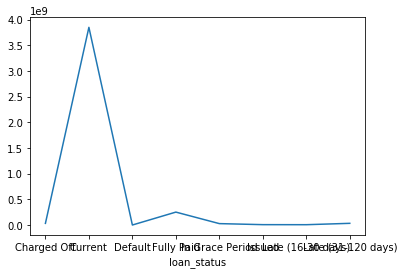

In [66]:
df.groupby(by='loan_status')['loan_amnt'].sum().plot()

In [67]:
## Loan Status vs Fico score
df.groupby(by='loan_status')['fico_range_low'].mean()

loan_status
Charged Off           700.023065
Current               705.904324
Default               697.045455
Fully Paid            711.758851
In Grace Period       697.390039
Issued                702.835616
Late (16-30 days)     698.790932
Late (31-120 days)    696.493021
Name: fico_range_low, dtype: float64

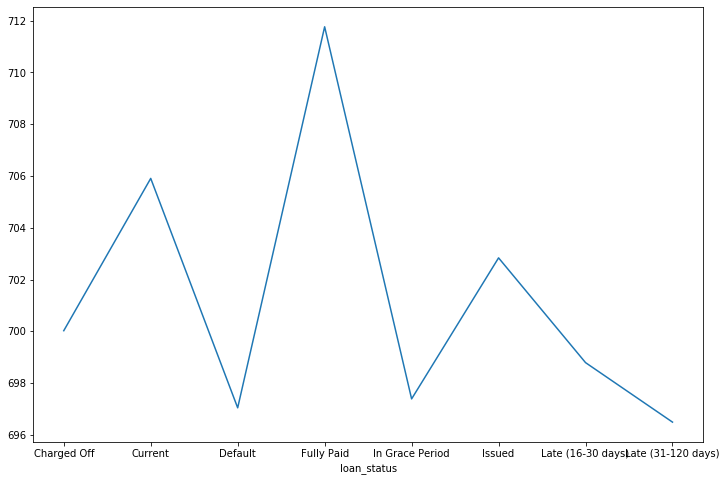

In [68]:
## Loan Status vs Fico score
plt.figure(figsize=(12, 8))
df.groupby(by='loan_status')['fico_range_low'].mean().plot();

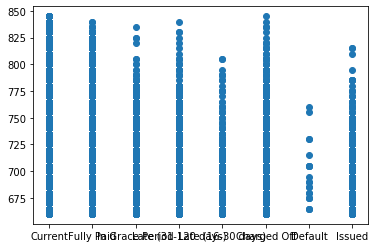

In [69]:
plt.scatter(df['loan_status'], df['fico_range_low'])

#### Setting Target y variable for the Logistic Regression 

Here we are creating the Loan Status target variables based on the values provide in the Loan Status column. Our goal is predict the probability of loan default, and thus we are grouping the values within the Loan Status into Current/Good vs Loan Default/Bad loans.

Holding a consevative approach: Charged off, Default, Late (16-30 days), and Late (31-120 days) are included in the Loan default category.

1 - Good loans, 0 - Bad loans
1    0.982825
0    0.017175

Baseline for our model is: 0.9828 (current/good loans)

In [70]:
#Huge class imbalance
df['loan_status'].value_counts(dropna=False)

Current               230570
Fully Paid             17935
Late (31-120 days)      2006
Charged Off             1951
In Grace Period         1546
Late (16-30 days)        397
Issued                   365
Default                   22
Name: loan_status, dtype: int64

In [71]:
#Huge class imbalance
df['loan_status'].value_counts(normalize=True)

Current               0.904934
Fully Paid            0.070391
Late (31-120 days)    0.007873
Charged Off           0.007657
In Grace Period       0.006068
Late (16-30 days)     0.001558
Issued                0.001433
Default               0.000086
Name: loan_status, dtype: float64

In [72]:
2006 + 1951 + 397 + 22

4376

In [73]:
# will create a new columns df['loan_status_lr']

def loan_status_classification(string):
    if "Current" in string:
        return 1 
    elif "Fully Paid" in string:
        return 1
    elif "Late" in string:
        return 0
    elif "Charged Off" in string:
        return 0
    elif "In Grace Period" in string:
        return 1
    elif "Issued" in string:
        return 1
    elif "Default" in string:
        return 0
    
df['loan_status_log'] = df['loan_status'].map(loan_status_classification)    

In [74]:
df.shape

(254792, 77)

In [75]:
df['loan_status_log'].value_counts() #these values match 1 vs 0 I've calculated

1    250416
0      4376
Name: loan_status_log, dtype: int64

In [76]:
df['loan_status_log'].value_counts(normalize=True)  #class imbalance

1    0.982825
0    0.017175
Name: loan_status_log, dtype: float64

In [77]:
df.shape

(254792, 77)

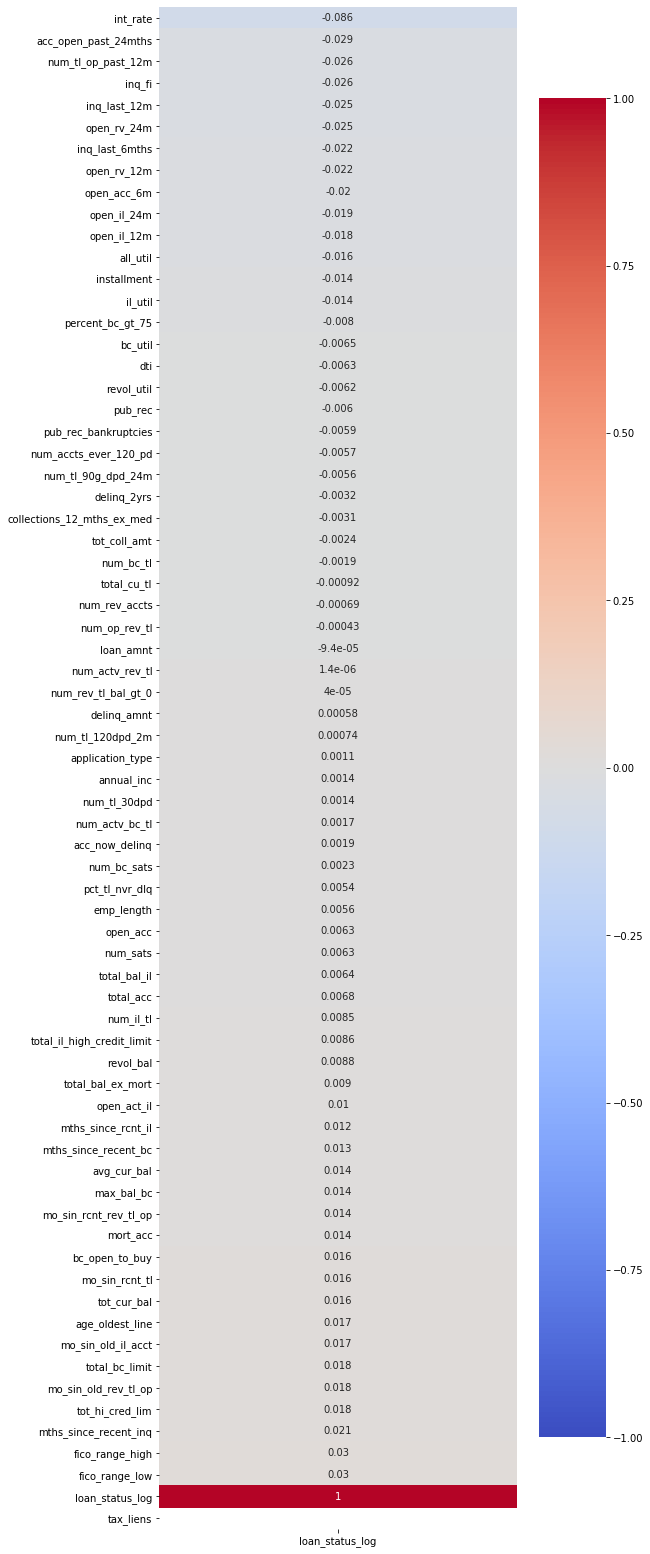

In [78]:
plt.figure(figsize=(8,28))

sns.heatmap(df.corr()[['loan_status_log']].sort_values('loan_status_log'), 
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

The correlations are weak as expected. We have many variables affecting the Loan Status (our y varibale). 

In [79]:
df

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line,loan_status_log
0,33000.0,60 months,15.24,789.24,C,10,MORTGAGE,84000.0,Source Verified,Current,...,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,31.0,1
1,19000.0,36 months,6.46,581.99,A,10,MORTGAGE,83000.0,Verified,Current,...,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,23.0,1
2,15000.0,36 months,7.02,463.30,A,5,MORTGAGE,129000.0,Source Verified,Current,...,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,13.0,1
3,21325.0,60 months,13.08,486.09,B,3,MORTGAGE,87000.0,Verified,Current,...,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0,31.0,1
4,12000.0,60 months,17.74,303.03,C,8,RENT,75000.0,Verified,Current,...,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,36 months,17.74,540.34,C,1,RENT,62000.0,Source Verified,Current,...,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0,14.0,1
254790,6000.0,36 months,11.02,196.49,B,10,MORTGAGE,80000.0,Not Verified,Current,...,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0,13.0,1
254791,10525.0,36 months,7.56,327.69,A,10,OWN,40000.0,Source Verified,Current,...,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,33.0,1
254792,16000.0,36 months,11.71,529.22,B,10,RENT,80000.0,Source Verified,Current,...,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,25.0,1


In [80]:
df_dummies

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
254789,0,0,0,0,0,1,0,0,1,1,0
254790,0,0,0,1,1,0,0,0,0,0,0
254791,0,0,0,1,0,0,0,1,0,1,0
254792,0,1,0,0,1,0,0,0,1,1,0


## Logistic Regression

In [187]:
## Define X and y

X = df.drop(columns = ['open_rv_12m', 'num_sats', 'fico_range_high', 'installment', 'pub_rec', 'num_rev_tl_bal_gt_0', 'num_actv_rev_tl', 'total_il_high_credit_limit', 'loan_status', 'loan_status_log', 'term', 'purpose', 'addr_state', 'grade', 'home_ownership', 'verification_status', 'application_type'], axis=1)
y = df[['loan_status_log']]

In [188]:
X.shape

(254792, 60)

In [189]:
X

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,age_oldest_line
0,33000.0,15.24,10,84000.0,35.07,0.0,695.0,0.0,26.0,79282.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,31.0
1,19000.0,6.46,10,83000.0,20.68,0.0,785.0,1.0,7.0,11068.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,23.0
2,15000.0,7.02,5,129000.0,28.45,0.0,770.0,0.0,19.0,11023.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,13.0
3,21325.0,13.08,3,87000.0,52.39,0.0,725.0,0.0,18.0,125907.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,31.0
4,12000.0,17.74,8,75000.0,32.96,0.0,685.0,1.0,22.0,17006.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,17.74,1,62000.0,32.97,0.0,695.0,1.0,11.0,16490.0,...,0.0,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,14.0
254790,6000.0,11.02,10,80000.0,34.13,0.0,720.0,0.0,15.0,27955.0,...,0.0,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,13.0
254791,10525.0,7.56,10,40000.0,14.52,0.0,750.0,1.0,14.0,472.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,33.0
254792,16000.0,11.71,10,80000.0,7.29,0.0,715.0,3.0,14.0,2599.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,25.0


In [190]:
y.drop(y.index[[21141, 227679]], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [191]:
y.shape

(254790, 1)

#### Scaling data with StandardScaler

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [194]:
X_sc

array([[ 1.6171311 ,  0.39239087,  1.1635798 , ...,  0.25260389,
         3.34434277,  2.07796917],
       [ 0.24370638, -1.30546305,  1.1635798 , ..., -0.62194033,
         0.27387356,  0.98794561],
       [-0.14870068, -1.19717169, -0.23191719, ...,  0.975994  ,
        -0.06409378, -0.37458383],
       ...,
       [-0.58770608, -1.09274787,  1.1635798 , ..., -0.95517338,
         0.27746895,  2.35047506],
       [-0.05059891, -0.29023149,  1.1635798 , ..., -0.94527135,
        -0.75441004,  1.2604515 ],
       [ 0.34180815, -0.15680106,  1.1635798 , ..., -0.83531646,
         0.0869129 , -0.23833089]])

In [195]:
pd.DataFrame(X_sc)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.617131,0.392391,1.163580,-0.068249,1.005612,-0.305574,-0.320706,-0.716427,2.157832,2.736713,...,-0.136136,-0.180899,0.592946,-0.299111,-0.333185,0.0,0.694716,0.252604,3.344343,2.077969
1,0.243706,-1.305463,1.163580,-0.077716,-0.074197,-0.305574,2.272749,0.506612,-0.948772,-0.313111,...,-0.136136,-1.212483,0.592946,0.254429,-0.333185,0.0,-0.153375,-0.621940,0.273874,0.987946
2,-0.148701,-1.197172,-0.231917,0.357785,0.508855,-0.305574,1.840506,-0.716427,1.013293,-0.315123,...,-0.136136,1.366476,0.592946,-0.935979,-0.333185,0.0,0.963659,0.975994,-0.064094,-0.374584
3,0.471793,-0.025304,-0.790116,-0.039847,2.305284,-0.305574,0.543779,-0.716427,0.849788,4.821300,...,-0.136136,-0.696691,0.592946,-0.510408,-0.333185,0.0,2.265113,2.441427,0.849137,2.077969
4,-0.443006,0.875834,0.605381,-0.153456,0.847280,-0.305574,-0.608868,0.506612,1.503810,-0.047625,...,-0.136136,-0.180899,0.334717,-0.123526,-0.333185,0.0,-0.141035,1.187610,0.550719,0.987946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254787,-0.148701,0.875834,-1.348315,-0.276532,0.848030,-0.305574,-0.320706,0.506612,-0.294750,-0.070695,...,-0.136136,0.334893,0.287766,0.552030,-0.333185,0.0,-0.273566,1.206720,0.072531,-0.238331
254788,-1.031617,-0.423662,1.163580,-0.106119,0.935075,-0.305574,0.399698,-0.716427,0.359272,0.441901,...,-0.136136,-0.696691,0.592946,0.055035,-0.333185,0.0,0.228948,0.360511,-0.606999,-0.374584
254789,-0.587706,-1.092748,1.163580,-0.484816,-0.536436,-0.305574,1.264183,0.506612,0.195766,-0.786854,...,-0.136136,1.366476,0.358192,-0.935979,-0.333185,0.0,-0.726705,-0.955173,0.277469,2.350475
254790,-0.050599,-0.290231,1.163580,-0.106119,-1.078966,-0.305574,0.255617,2.952691,0.195766,-0.691757,...,-0.136136,2.913852,-1.085543,-0.935979,-0.333185,0.0,-0.972996,-0.945271,-0.754410,1.260452


In [196]:
pd.DataFrame(X_sc, columns=X.columns) #turning X_sc into a dataframe

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,age_oldest_line
0,1.617131,0.392391,1.163580,-0.068249,1.005612,-0.305574,-0.320706,-0.716427,2.157832,2.736713,...,-0.136136,-0.180899,0.592946,-0.299111,-0.333185,0.0,0.694716,0.252604,3.344343,2.077969
1,0.243706,-1.305463,1.163580,-0.077716,-0.074197,-0.305574,2.272749,0.506612,-0.948772,-0.313111,...,-0.136136,-1.212483,0.592946,0.254429,-0.333185,0.0,-0.153375,-0.621940,0.273874,0.987946
2,-0.148701,-1.197172,-0.231917,0.357785,0.508855,-0.305574,1.840506,-0.716427,1.013293,-0.315123,...,-0.136136,1.366476,0.592946,-0.935979,-0.333185,0.0,0.963659,0.975994,-0.064094,-0.374584
3,0.471793,-0.025304,-0.790116,-0.039847,2.305284,-0.305574,0.543779,-0.716427,0.849788,4.821300,...,-0.136136,-0.696691,0.592946,-0.510408,-0.333185,0.0,2.265113,2.441427,0.849137,2.077969
4,-0.443006,0.875834,0.605381,-0.153456,0.847280,-0.305574,-0.608868,0.506612,1.503810,-0.047625,...,-0.136136,-0.180899,0.334717,-0.123526,-0.333185,0.0,-0.141035,1.187610,0.550719,0.987946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254787,-0.148701,0.875834,-1.348315,-0.276532,0.848030,-0.305574,-0.320706,0.506612,-0.294750,-0.070695,...,-0.136136,0.334893,0.287766,0.552030,-0.333185,0.0,-0.273566,1.206720,0.072531,-0.238331
254788,-1.031617,-0.423662,1.163580,-0.106119,0.935075,-0.305574,0.399698,-0.716427,0.359272,0.441901,...,-0.136136,-0.696691,0.592946,0.055035,-0.333185,0.0,0.228948,0.360511,-0.606999,-0.374584
254789,-0.587706,-1.092748,1.163580,-0.484816,-0.536436,-0.305574,1.264183,0.506612,0.195766,-0.786854,...,-0.136136,1.366476,0.358192,-0.935979,-0.333185,0.0,-0.726705,-0.955173,0.277469,2.350475
254790,-0.050599,-0.290231,1.163580,-0.106119,-1.078966,-0.305574,0.255617,2.952691,0.195766,-0.691757,...,-0.136136,2.913852,-1.085543,-0.935979,-0.333185,0.0,-0.972996,-0.945271,-0.754410,1.260452


In [197]:
df_dummies

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
254789,0,0,0,0,0,1,0,0,1,1,0
254790,0,0,0,1,1,0,0,0,0,0,0
254791,0,0,0,1,0,0,0,1,0,1,0
254792,0,1,0,0,1,0,0,0,1,1,0


In [198]:
df_sc = pd.DataFrame(X_sc, columns=X.columns)  #gave it a name

In [199]:
df_sc.isna().sum().sum()

0

In [200]:
df_dummies.isna().sum().sum()

0

In [201]:
pd.concat([df_dummies, df_sc], axis=1).dropna().isna().sum().sum()

0

In [202]:
df_final = pd.concat([df_dummies, df_sc], axis=1, join='inner')

In [203]:
df_final

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,age_oldest_line
0,1,0,0,0,0,1,0,0,0,1,...,-0.136136,-0.180899,0.592946,-0.299111,-0.333185,0.0,0.694716,0.252604,3.344343,2.077969
1,0,1,0,0,0,0,0,0,0,0,...,-0.136136,-1.212483,0.592946,0.254429,-0.333185,0.0,-0.153375,-0.621940,0.273874,0.987946
2,0,0,0,0,0,0,0,0,0,1,...,-0.136136,1.366476,0.592946,-0.935979,-0.333185,0.0,0.963659,0.975994,-0.064094,-0.374584
3,1,0,1,0,1,0,0,0,0,0,...,-0.136136,-0.696691,0.592946,-0.510408,-0.333185,0.0,2.265113,2.441427,0.849137,2.077969
4,1,0,0,0,0,1,0,0,1,0,...,-0.136136,-0.180899,0.334717,-0.123526,-0.333185,0.0,-0.141035,1.187610,0.550719,0.987946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254787,0,1,0,0,0,1,0,0,0,0,...,-0.136136,0.334893,0.287766,0.552030,-0.333185,0.0,-0.273566,1.206720,0.072531,-0.238331
254788,1,1,0,0,1,0,0,0,0,1,...,-0.136136,-0.696691,0.592946,0.055035,-0.333185,0.0,0.228948,0.360511,-0.606999,-0.374584
254789,0,0,0,0,0,1,0,0,1,1,...,-0.136136,1.366476,0.358192,-0.935979,-0.333185,0.0,-0.726705,-0.955173,0.277469,2.350475
254790,0,0,0,1,1,0,0,0,0,0,...,-0.136136,2.913852,-1.085543,-0.935979,-0.333185,0.0,-0.972996,-0.945271,-0.754410,1.260452


Note: the stnd deviations columns in the numeric. Dataframe size 254790 rows × 79 columns

In [204]:
y.shape

(254790, 1)

In [205]:
df_final[df_final['grade_D'].isnull()]  #dummies side

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,age_oldest_line


In [206]:
df_final[df_final['tax_liens'].isnull()] #numeric side

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,age_oldest_line


In [207]:
df_final.isna().sum().sum()

0

### Train_test_split

In [208]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.4, random_state=42)

In [209]:
X_train.shape

(152874, 71)

In [210]:
y_train.shape

(152874, 1)

### Logistic Regression

In [211]:
#Instantiate
logreg = LogisticRegression(solver = 'liblinear', max_iter=1000) #liblinear solver - ran with no errors

#Fit
logreg.fit(X_train, y_train.values.ravel()) #yay!!

#Print coef
print(f'Logistic Regression Coefficient: {logreg.coef_}')
print(f'Logistic Regression Intercept: {logreg.intercept_}')

Logistic Regression Coefficient: [[-0.02858967  0.04447067 -0.06541797 -0.1034613   0.06254637  0.10152207
   0.1634751   0.12358566 -0.00473356 -0.1848857  -0.19582455 -0.10253734
  -0.55886073  0.01219816 -0.02978687 -0.00737534  0.00370703  0.03108562
  -0.02765635  0.14450403 -0.04120419  0.07893354 -0.08730074  0.00799735
   0.08096151 -0.00174055  0.17624626  0.05295196  0.01985096 -0.00911702
   0.13139016  0.0022195  -0.10573442  0.0157569   0.15372655  0.05190242
  -0.07622212 -0.04878886 -0.04053074 -0.00558406 -0.32071727  0.06484719
   0.08301396  0.05938436  0.00738468  0.06791552  0.08098072 -0.01350533
  -0.01247789  0.04583659  0.02477438  0.09145282  0.00198284  0.07744328
   0.10466296 -0.14418166  0.1321992  -0.03674952  0.07977148  0.00491124
   0.00634916 -0.03303661 -0.05943551 -0.00290496 -0.00214418 -0.01317464
   0.         -0.15549593  0.09444446 -0.13112202 -0.0720023 ]]
Logistic Regression Intercept: [4.30851264]


In [212]:
#Instantiate
logreg_lb = LogisticRegression(solver = 'lbfgs', max_iter=2000)  #lbfgs solver

#Fit
logreg_lb.fit(X_train, y_train.values.ravel())

#Print coef
print(f'Logistic Regression Coefficient: {logreg_lb.coef_}')
print(f'Logistic Regression Intercept: {logreg_lb.intercept_}')

Logistic Regression Coefficient: [[-0.03041578  0.03884877 -0.07234278 -0.10908242  0.05834972  0.09800383
   0.16031353  0.11988333 -0.00852035 -0.18881053 -0.19867491 -0.10270604
  -0.55955706  0.01228456 -0.02981508 -0.00742245  0.00369007  0.03124854
  -0.02765407  0.14402328 -0.04426858  0.07905586 -0.07701363  0.00796516
   0.08819698 -0.00171933  0.17693071  0.05307159  0.02030579 -0.00906498
   0.13156341  0.00226302 -0.11215473  0.01577508  0.1540468   0.05178154
  -0.07631358 -0.04888766 -0.04056858 -0.00556296 -0.32120667  0.06488645
   0.08240301  0.05941138  0.00746677  0.06810612  0.08121192 -0.01358767
  -0.01248841  0.04446347  0.02488709  0.09171358  0.0019077   0.07742915
   0.10529044 -0.14488086  0.12582512 -0.03654499  0.07373563  0.01472555
   0.02484657 -0.03307048 -0.05964169 -0.00293782 -0.00213499 -0.01318488
   0.         -0.15607566  0.10177284 -0.13051337 -0.07231334]]
Logistic Regression Intercept: [4.32263484]


In [213]:
np.exp(logreg.coef_)

array([[0.97181514, 1.04547431, 0.93667587, 0.90171092, 1.06454382,
        1.10685435, 1.17759604, 1.13154693, 0.99527762, 0.83119929,
        0.82215647, 0.90254445, 0.57186019, 1.01227286, 0.97065239,
        0.99265179, 1.00371391, 1.03157383, 0.97272258, 1.15546636,
        0.95963316, 1.0821324 , 0.91640145, 1.00802942, 1.08432916,
        0.99826096, 1.19273175, 1.054379  , 1.0200493 , 0.99092441,
        1.14041264, 1.00222196, 0.89966355, 1.01588169, 1.16617195,
        1.05327296, 0.92661036, 0.9523822 , 0.96027964, 0.99443151,
        0.72562838, 1.06699596, 1.08655698, 1.06118304, 1.00741201,
        1.07027489, 1.08434999, 0.98658546, 0.98759963, 1.04690332,
        1.02508382, 1.09576508, 1.00198481, 1.08052094, 1.11033632,
        0.86573047, 1.14133566, 0.96391755, 1.08303954, 1.00492332,
        1.00636935, 0.96750314, 0.9422963 , 0.99709926, 0.99785812,
        0.98691176, 1.        , 0.85599056, 1.09904812, 0.87711074,
        0.93052876]])

In [214]:
np.exp(logreg.coef_)[0]

array([0.97181514, 1.04547431, 0.93667587, 0.90171092, 1.06454382,
       1.10685435, 1.17759604, 1.13154693, 0.99527762, 0.83119929,
       0.82215647, 0.90254445, 0.57186019, 1.01227286, 0.97065239,
       0.99265179, 1.00371391, 1.03157383, 0.97272258, 1.15546636,
       0.95963316, 1.0821324 , 0.91640145, 1.00802942, 1.08432916,
       0.99826096, 1.19273175, 1.054379  , 1.0200493 , 0.99092441,
       1.14041264, 1.00222196, 0.89966355, 1.01588169, 1.16617195,
       1.05327296, 0.92661036, 0.9523822 , 0.96027964, 0.99443151,
       0.72562838, 1.06699596, 1.08655698, 1.06118304, 1.00741201,
       1.07027489, 1.08434999, 0.98658546, 0.98759963, 1.04690332,
       1.02508382, 1.09576508, 1.00198481, 1.08052094, 1.11033632,
       0.86573047, 1.14133566, 0.96391755, 1.08303954, 1.00492332,
       1.00636935, 0.96750314, 0.9422963 , 0.99709926, 0.99785812,
       0.98691176, 1.        , 0.85599056, 1.09904812, 0.87711074,
       0.93052876])

In [215]:
np.exp(logreg.coef_)[0][0]

0.9718151432380644

In [216]:
# Step 4: Evaluate model.
print(f'Logistic Regression Accuracy Score: {logreg.score(X_test, y_test)}')

#Accuracy is number of correct predictioons / number of predictions
#1    0.982825
#0    0.017175

Logistic Regression Accuracy Score: 0.9827112524039405


In [217]:
# Step 4: Evaluate model.
print(f'Logistic Regression Accuracy Score: {logreg_lb.score(X_test, y_test)}')

Logistic Regression Accuracy Score: 0.9827112524039405


In [218]:
#Predicting the values - testing set

logreg.predict_proba(X_test)

array([[0.01698994, 0.98301006],
       [0.09571495, 0.90428505],
       [0.03269199, 0.96730801],
       ...,
       [0.00940479, 0.99059521],
       [0.01506889, 0.98493111],
       [0.03268617, 0.96731383]])

In [219]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 864x864 with 0 Axes>

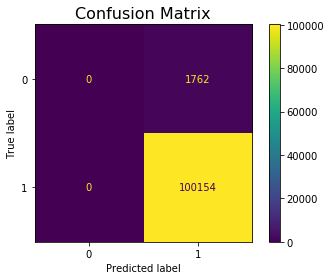

In [220]:
plt.figure(figsize=(12, 12))

plot_confusion_matrix(logreg, X_test, y_test, values_format='.0f'); 

plt.title('Confusion Matrix', fontsize=16);

In [221]:
1762/(1762 + 100154)*100

1.72887475960595

In [222]:
X_train.columns

Index(['term_ 60 months', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_other', 'grade_B', 'grade_C',
       'grade_D', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since

In [223]:
coef = []
columns = []
for x,y  in zip(np.exp(logreg.coef_)[0], X_train.columns.values):
    coef.append(x)
    columns.append(y)
    

In [224]:
pd.DataFrame({'coef': coef, 'features': columns})

,coef,features
0,0.971815,term_ 60 months
1,1.045474,purpose_debt_consolidation
2,0.936676,purpose_home_improvement
3,0.901711,purpose_other
4,1.064544,grade_B
...,...,...
66,1.000000,tax_liens
67,0.855991,tot_hi_cred_lim
68,1.099048,total_bal_ex_mort
69,0.877111,total_bc_limit


In [225]:
df_features = pd.DataFrame({'coef': coef, 'features': columns})

In [226]:
top20 = df_features.sort_values(by='coef', ascending=False).head(20)
top20

,coef,features
26,1.192732,tot_cur_bal
6,1.177596,grade_D
34,1.166172,open_rv_24m
19,1.155466,open_acc
56,1.141336,num_il_tl
30,1.140413,open_il_24m
7,1.131547,home_ownership_OWN
54,1.110336,num_bc_sats
5,1.106854,grade_C
68,1.099048,total_bal_ex_mort


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

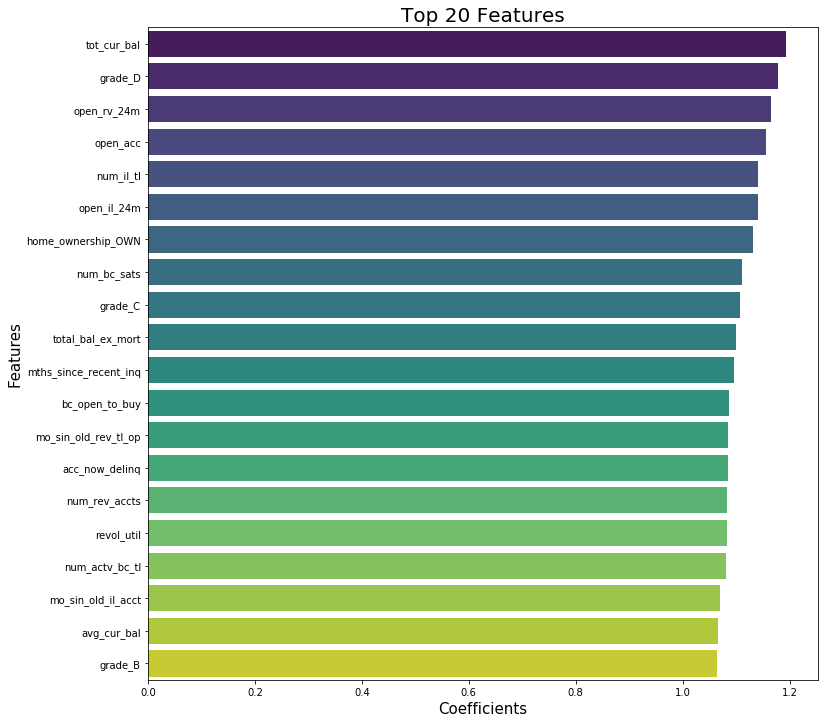

In [228]:
plt.figure(figsize=(12, 12))

sns.barplot(data=top20, x='coef', y='features', palette='viridis');

plt.xlabel('Coefficients', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Top 20 Features', fontsize=20)

plt.savefig("Top20Features.png");

#open_acc	The number of open credit lines in the borrower's credit file
#loan_amnt - loan amount
#open_rv_24m	Number of revolving trades opened in past 24 months
#grade	LC assigned loan grade
#num_bc_sats	Number of satisfactory bankcard accounts
#total_bal_ex_mort	Total credit balance excluding mortgage
#open_il_24m	Number of installment accounts opened in past 24 months
#pub_rec_bankruptcies	Number of public record bankruptcies
#home_ownership	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
#num_actv_rev_tl	Number of currently active revolving trades

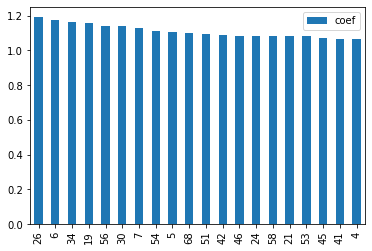

In [229]:
df_features.sort_values(by='coef', ascending=False).head(20).plot(kind='bar')

In [230]:
df_features.sort_values(by='coef', ascending=False).head(40)

# loan amnt is a numeric - so 1 standard deviation increase in loan_amnt increases the odds of being current by 32% 

# SD (dummified) - being from SD increses the chance of being current by 76%

,coef,features
26,1.192732,tot_cur_bal
6,1.177596,grade_D
34,1.166172,open_rv_24m
19,1.155466,open_acc
56,1.141336,num_il_tl
30,1.140413,open_il_24m
7,1.131547,home_ownership_OWN
54,1.110336,num_bc_sats
5,1.106854,grade_C
68,1.099048,total_bal_ex_mort


In [231]:
coef

[0.9718151432380644,
 1.0454743117189462,
 0.9366758748895874,
 0.9017109200364833,
 1.0645438229456574,
 1.1068543517808114,
 1.1775960378390475,
 1.1315469287755235,
 0.9952776243893802,
 0.8311992860691967,
 0.8221564718707237,
 0.9025444512760086,
 0.5718601934080751,
 1.012272861675038,
 0.9706523893035623,
 0.9926517882813767,
 1.0037139065221714,
 1.031573826301404,
 0.9727225834878512,
 1.1554663562269207,
 0.9596331616986948,
 1.0821324017513347,
 0.9164014531084778,
 1.0080294158080247,
 1.0843291554133803,
 0.9982609617175786,
 1.1927317462817069,
 1.0543789962037735,
 1.0200493018288854,
 0.9909244142601684,
 1.1404126402499644,
 1.0022219602404165,
 0.8996635514859239,
 1.01588169206815,
 1.166171952484983,
 1.053272963251858,
 0.9266103641613654,
 0.9523821980891717,
 0.9602796430562514,
 0.9944315063497549,
 0.725628378819268,
 1.0669959647697294,
 1.0865569791921377,
 1.061183037317919,
 1.0074120112920344,
 1.0702748903661679,
 1.0843499869464452,
 0.9865854572024383,


In [232]:
columns

['term_ 60 months',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_other',
 'grade_B',
 'grade_C',
 'grade_D',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'loan_amnt',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc

In [233]:
# Coef and variables
for x,y  in zip(np.exp(logreg.coef_)[0], X_train.columns.values):
    print(x,y)

0.9718151432380644 term_ 60 months
1.0454743117189462 purpose_debt_consolidation
0.9366758748895874 purpose_home_improvement
0.9017109200364833 purpose_other
1.0645438229456574 grade_B
1.1068543517808114 grade_C
1.1775960378390475 grade_D
1.1315469287755235 home_ownership_OWN
0.9952776243893802 home_ownership_RENT
0.8311992860691967 verification_status_Source Verified
0.8221564718707237 verification_status_Verified
0.9025444512760086 loan_amnt
0.5718601934080751 int_rate
1.012272861675038 emp_length
0.9706523893035623 annual_inc
0.9926517882813767 dti
1.0037139065221714 delinq_2yrs
1.031573826301404 fico_range_low
0.9727225834878512 inq_last_6mths
1.1554663562269207 open_acc
0.9596331616986948 revol_bal
1.0821324017513347 revol_util
0.9164014531084778 total_acc
1.0080294158080247 collections_12_mths_ex_med
1.0843291554133803 acc_now_delinq
0.9982609617175786 tot_coll_amt
1.1927317462817069 tot_cur_bal
1.0543789962037735 open_acc_6m
1.0200493018288854 open_act_il
0.9909244142601684 open

In [234]:
X_train.columns.values

array(['term_ 60 months', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_other', 'grade_B', 'grade_C',
       'grade_D', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified',
       'verification_status_Verified', 'loan_amnt', 'int_rate',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mth

## Random Forest

In [235]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [236]:
rf = RandomForestClassifier()

In [237]:
et = ExtraTreesClassifier()

In [238]:
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100]
}
gs = GridSearchCV(rf, param_grid=params, cv=5)
gs.fit(X_train, y_train.values.ravel())
print(gs.best_score_) # cross val score
gs.best_params_

0.9829009512782975


{'n_estimators': 50}

#### GridSearch

In [240]:
#playing with the model to improve the score
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100],
    'max_features': [None, 'auto'],
    'max_depth': [None, 2, 3, 4]  #more parameters takes longer to run the model!

}

gs = GridSearchCV(rf, param_grid=params, cv=5)
gs.fit(X_train, y_train.values.ravel())
print(gs.best_score_) # cross val score
gs.best_params_

The Random Forest produced the results with an accuracy of 0.9829, which is similar to the Logistic Regression.

0.9829009512782975
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}